The `Dataset` class is the main class that is maniupulated in the `trackio` library. It contains reference to each individual `Agent` in the `Dataset`, as well as various attributes and methods that allow one to operate on the data stored in each `Agent` class object, including the track data.

There are a few ways to instantiate a `Dataset`. The first is from raw, unprocessed data files.

In [ ]:
import trackio as tio
import glob
import pandas as pd
import geopandas as gp

In [3]:
#define raw data files
data_path = './files'
files = glob.glob(f'{data_path}/*clipped_to_polygon*.csv')

files

['./files\\AIS_2021_01_01_clipped_to_polygon.csv']

When you create a `Dataset`, you also need to specify a `data_path` keyword argument. This is where trackio will stored the processed data once you start splitting the raw data.

In [4]:
#create the Dataset
ds = tio.read(raw_files=files,
              data_path='example0')


No dataset.db found in c:\code\trackio\notebooks\example0. 
Using default units/crs. 
Edit self.meta and then run self.refresh_meta to update.



This warning just means that no `dataset.db` file was found in the `data_path`. This file contains metadata about the `Dataset`.

You can view metadata from the `Dataset` by using the `repr`, or by accessing the `Dataset.meta` attribute.

In [5]:
#the repr
ds

Type:
    <class 'trackio.Dataset.Dataset'>
Status:
    1 Unprocessed CSV Files
    0 Processed CSV Files
    0 Unsplit Agent Files
    0 Split Agent Files
Static Data Fields:
    []
Dynamic Data Fields:
    ['X', 'Y']
Metadata:
    X: degrees
    Y: degrees
    CRS: EPSG:4326
Data Path:
    c:\code\trackio\notebooks\example0

In [6]:
#the metadata dict - this can be edited manually to keep track of data information
ds.meta

{'X': 'degrees',
 'Y': 'degrees',
 'CRS': <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 'Static Data': [],
 'Dynamic Data': ['X', 'Y']}

You can also instantiate a `Dataset` using a pandas DataFrame:

In [10]:
#generate a dataframe
df = pd.read_csv(files[0])

#instantiate the Dataset
ds = tio.from_df(df, data_path='files')


No dataset.db found in c:\code\trackio\notebooks\files. 
Using default units/crs. 
Edit self.meta and then run self.refresh_meta to update.



You can also do it with a geopandas GeoDataFrame. The GeoDataFrame must include a geometry column with only LineStrings, as well as at least one other column which can be used as a unique identifier for each geometry feature.

In [18]:
#read the raw data
gdf = gp.read_file(f'{data_path}/raw_tracks.gpkg')

gdf

,identifier,geometry
0,1,"LINESTRING (-74.03934 40.59620, -74.04682 40.6..."
1,2,"LINESTRING (-74.04377 40.59590, -74.04666 40.6..."
2,3,"LINESTRING (-74.04270 40.59666, -74.04865 40.6..."
3,4,"LINESTRING (-74.04712 40.59941, -74.05246 40.6..."


<Axes: >

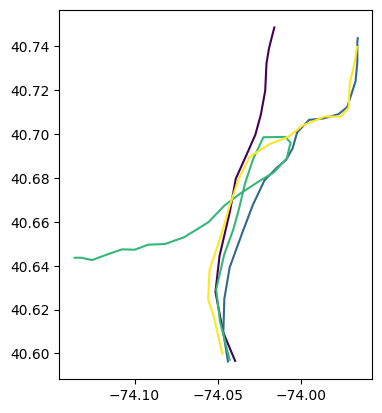

In [25]:
gdf.plot(column='identifier')

In [26]:
#create the Dataset
ds = tio.from_gdf(gdf, data_path=data_path)


No dataset.db found in c:\code\trackio\notebooks\files. 
Using default units/crs. 
Edit self.meta and then run self.refresh_meta to update.



You cannot run `ds.refresh_meta()` until you start processing the raw data. See the next notebook.